# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
columns=["City", "Latitude", "Temperature", "Cloudiness", "Windspeed"]
city_pd = pd.DataFrame(columns=columns)
city_pd["City"] = cities


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, row in city_pd.iterrows():
    city = city_pd.loc[index,"City"]
    unit ="metric"
    final_url=f'{url}q={city}&appid={api_key}&units={unit}'
    response = requests.get(final_url).json()
    try:
        city_pd.loc[index,"Latitude"] = response["coord"]["lat"]
        city_pd.loc[index,"Temperature"] = response["main"]["temp"]
        city_pd.loc[index,"Humidity"] = response["main"]["humidity"]
        city_pd.loc[index,"Cloudiness"] = response["clouds"]["all"]
        city_pd.loc[index,"Windspeed"] = response["wind"]["speed"]
    except (KeyError):
        print("not in list")

        


not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list
not in list


In [5]:
city_df = city_pd.dropna()
city_df

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,busselton,-33.64,9.76,5,12.18,64.0
1,provideniya,64.42,13,75,4,62.0
2,hasaki,35.73,27.25,75,4.1,88.0
3,camden,39.94,25.49,40,1.5,94.0
4,virginia beach,36.85,23.59,90,5.1,94.0
5,sukpak,51.65,21.33,7,1.34,40.0
6,necochea,-38.55,1.67,0,0.89,94.0
7,kapaa,22.08,30.34,40,6.7,62.0
8,cape town,-33.93,12.59,0,3.1,93.0
9,carnarvon,-30.97,13.23,0,3.64,28.0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_df.to_csv("output.csv")


In [3]:
file = ("output.csv")
df = pd.read_csv(file)
table_data = df[["City", "Latitude","Temperature", "Cloudiness", "Windspeed", "Humidity"]]
table_data.head()

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,busselton,-33.64,9.76,5,12.18,64.0
1,provideniya,64.42,13.00,75,4.00,62.0
2,hasaki,35.73,27.25,75,4.10,88.0
3,camden,39.94,25.49,40,1.50,94.0
4,virginia beach,36.85,23.59,90,5.10,94.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

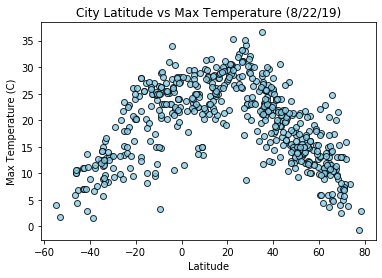

In [4]:
plt.scatter(table_data["Latitude"], table_data["Temperature"], c="skyblue", edgecolors="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (8/22/19)")
plt.savefig("latvstemp.png")


#### Latitude vs. Humidity Plot

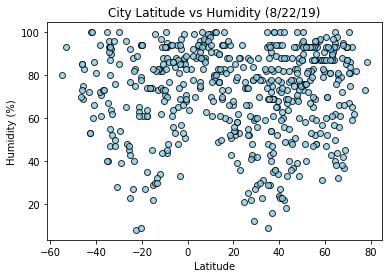

In [5]:
plt.scatter(table_data["Latitude"], table_data["Humidity"], c="skyblue", edgecolors="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (8/22/19)")
plt.savefig("latvshumidity.png")


#### Latitude vs. Cloudiness Plot

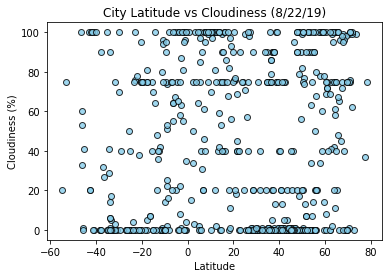

In [6]:
plt.scatter(table_data["Latitude"], table_data["Cloudiness"], c="skyblue", edgecolors="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (8/22/19)")
plt.savefig("latvscloudiness.png")

#### Latitude vs. Wind Speed Plot

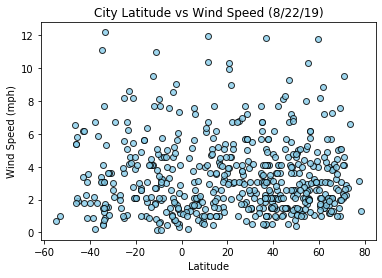

In [7]:
plt.scatter(table_data["Latitude"], table_data["Windspeed"], c="skyblue", edgecolors="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (8/22/19)")
plt.savefig("latvswindspeed.png")